In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Adding original images to the augmented folders

In [3]:
'''
import os
import shutil

l = ['normal', 'adenocarcinoma', 'large.cell.carcinoma', 'squamous.cell.carcinoma']

for file in l:
    origin = 'Data/train/' + file + '/'
    target = 'Data - All Trying/train_preprocessed/' + file + '/'

    files = os.listdir(origin)

    for file_name in files:
       shutil.copy(origin+file_name, target+file_name)
    print("Files are copied successfully")
    
l = ['normal', 'adenocarcinoma', 'large.cell.carcinoma', 'squamous.cell.carcinoma']

for file in l:
    origin = 'Data/test/' + file + '/'
    target = 'Data - All Trying/test_preprocessed/' + file + '/'

    files = os.listdir(origin)

    for file_name in files:
       shutil.copy(origin+file_name, target+file_name)
    print("Files are copied successfully")
    
l = ['normal', 'adenocarcinoma', 'large.cell.carcinoma', 'squamous.cell.carcinoma']

for file in l:
    origin = 'Data/valid/' + file + '/'
    target = 'Data - All Trying/valid_preprocessed/' + file + '/'

    files = os.listdir(origin)

    for file_name in files:
       shutil.copy(origin+file_name, target+file_name)
    print("Files are copied successfully")
'''

'\nimport os\nimport shutil\n\nl = [\'normal\', \'adenocarcinoma\', \'large.cell.carcinoma\', \'squamous.cell.carcinoma\']\n\nfor file in l:\n    origin = \'Data/train/\' + file + \'/\'\n    target = \'Data - All Trying/train_preprocessed/\' + file + \'/\'\n\n    files = os.listdir(origin)\n\n    for file_name in files:\n       shutil.copy(origin+file_name, target+file_name)\n    print("Files are copied successfully")\n    \nl = [\'normal\', \'adenocarcinoma\', \'large.cell.carcinoma\', \'squamous.cell.carcinoma\']\n\nfor file in l:\n    origin = \'Data/test/\' + file + \'/\'\n    target = \'Data - All Trying/test_preprocessed/\' + file + \'/\'\n\n    files = os.listdir(origin)\n\n    for file_name in files:\n       shutil.copy(origin+file_name, target+file_name)\n    print("Files are copied successfully")\n    \nl = [\'normal\', \'adenocarcinoma\', \'large.cell.carcinoma\', \'squamous.cell.carcinoma\']\n\nfor file in l:\n    origin = \'Data/valid/\' + file + \'/\'\n    target = \'Data

# VGG 16 

In [4]:
# File Directory for both the train and test
train_path = "Data - All Trying/train_preprocessed"
val_path = "Data - All Trying/valid_preprocessed"
test_path = "Data - All Trying/test"

In [5]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'adenocarcinoma': 585, 'large.cell.carcinoma': 345, 'normal': 444, 'squamous.cell.carcinoma': 465} 

 {'adenocarcinoma': 69, 'large.cell.carcinoma': 63, 'normal': 39, 'squamous.cell.carcinoma': 45} 

 {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90}


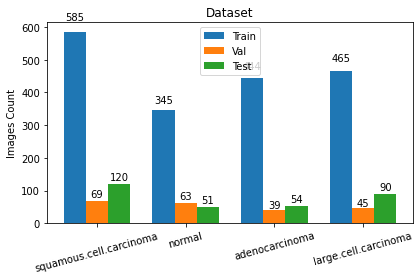

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()

for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, f'{int(height)}',
            ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, f'{int(height)}',
            ha='center', va='bottom')

for rect in rects3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height, f'{int(height)}',
            ha='center', va='bottom')

fig.tight_layout()
plt.show()

## Importing Keras for Image Classification

In [7]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [8]:
batchsize = 10

In [9]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = batchsize,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 1839 images belonging to 4 classes.


In [10]:
train_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = batchsize,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 216 images belonging to 4 classes.


In [12]:
val_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [13]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = batchsize,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [14]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

## VGG16 Model

In [15]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(350,350,3)
)

In [16]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4)                 204804    
                                                                 
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [18]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 40, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/40
183/183 [==============================] - ETA: 0s - loss: 1.5431 - accuracy: 0.5079
Epoch 1: val_accuracy improved from -inf to 0.47619, saving model to .\ct_vgg_best_model.hdf5
183/183 [==============================] - 1246s 7s/step - loss: 1.5431 - accuracy: 0.5079 - val_loss: 2.4731 - val_accuracy: 0.4762
Epoch 2/40
183/183 [==============================] - ETA: 0s - loss: 1.5035 - accuracy: 0.5806
Epoch 2: val_accuracy improved from 0.47619 to 0.57619, saving model to .\ct_vgg_best_model.hdf5
183/183 [==============================] - 1266s 7s/step - loss: 1.5035 - accuracy: 0.5806 - val_loss: 1.2760 - val_accuracy: 0.5762
Epoch 3/40
183/183 [==============================] - ETA: 0s - loss: 1.4045 - accuracy: 0.6047
Epoch 3: val_accuracy improved from 0.57619 to 0.60952, saving model to .\ct_vgg_best_model.hdf5
183/183 [==============================] - 1266s 7s/step - loss: 1.4045 - accuracy: 0.6047 - val_loss: 1.4921 - val_accuracy: 0.6095
Epoch 4/40
183/183 [=====

Epoch 29/40
183/183 [==============================] - ETA: 0s - loss: 1.0455 - accuracy: 0.7649
Epoch 29: val_accuracy did not improve from 0.70952
183/183 [==============================] - 1292s 7s/step - loss: 1.0455 - accuracy: 0.7649 - val_loss: 2.3365 - val_accuracy: 0.6571
Epoch 30/40
183/183 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.7786
Epoch 30: val_accuracy improved from 0.70952 to 0.73333, saving model to .\ct_vgg_best_model.hdf5
183/183 [==============================] - 1279s 7s/step - loss: 1.0186 - accuracy: 0.7786 - val_loss: 2.3418 - val_accuracy: 0.7333
Epoch 31/40
183/183 [==============================] - ETA: 0s - loss: 1.1320 - accuracy: 0.7638
Epoch 31: val_accuracy did not improve from 0.73333
183/183 [==============================] - 1284s 7s/step - loss: 1.1320 - accuracy: 0.7638 - val_loss: 2.2060 - val_accuracy: 0.6571
Epoch 32/40
183/183 [==============================] - ETA: 0s - loss: 1.0281 - accuracy: 0.7753
Epoch 32: v

In [27]:
# Loading the Best Fit Model 
model = load_model("./ct_vgg_best_model.hdf5")

In [20]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 70.79365253448486 %


In [21]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

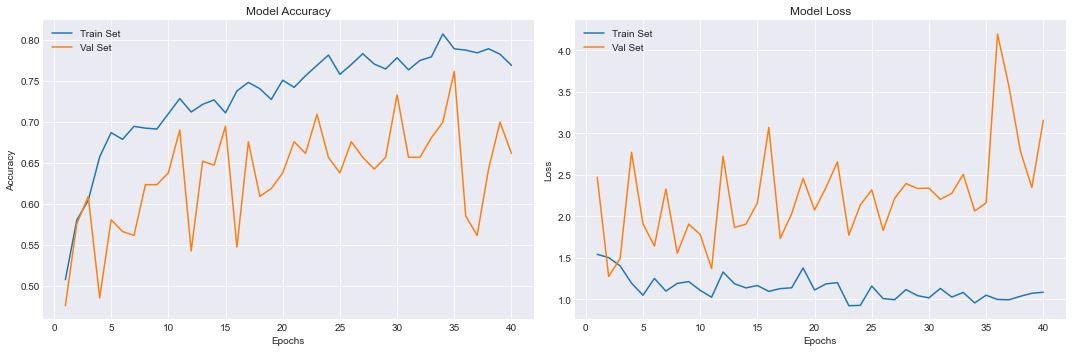

In [29]:
# Plot model performance
plt.style.use('seaborn-darkgrid')

acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.savefig("VGG results")
plt.show()

### Predictions

In [23]:
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    img = image.load_img(path, target_size=(350,350))
    norm_img = image.img_to_array(img)/255
    input_arr_img = np.array([norm_img])
    pred = np.argmax(_model.predict(input_arr_img))
    print(classes_dir[pred])

In [24]:
path = "Data - All Trying/test/large.cell.carcinoma/000110.png"
chestScanPrediction(path,model)

1/1 [==============================] - 1s 875ms/step
Large cell carcinoma
